<a href="https://colab.research.google.com/github/M-Amrollahi/Personal-Notes/blob/master/ML-notes/how_manualy_minimize_function_gd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## How to minimize a function in 2D

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the objective function
def objective(x):

    return np.array(x**3 + 3*x**2 + 2*x + 1)


# Define the gradient of the objective function
def gradient(x):

    return np.array(3*x**2 + 2*x + 1)

def f_get_new_results(x0, alpha=.01):
    # Define the initial guess

    x_new = x0.copy()
    x_res = np.stack((x_new),axis=0)
    y_res = np.stack((objective(x_new)),axis=0)
    for i in range(10):
        x_new = x_new - alpha * gradient(x_new)

        x_res = np.vstack((x_res, x_new))
        y_res = np.vstack((y_res, objective(x_new)))

    return x_res, y_res

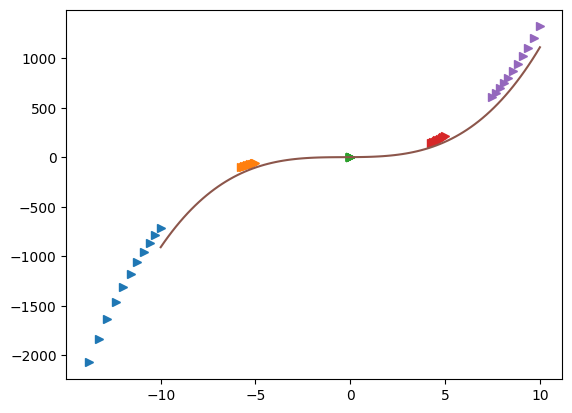

In [10]:
x0_s = np.linspace(-10,10,5)

results = []
for x in x0_s.tolist():
    r = f_get_new_results(np.array([x]), alpha=.001)
    results.append(r)

    plt.plot(r[0],r[1], ">")

x = np.linspace(-10, 10, 100)


# Evaluate z values
Z = x**3 + x**2 + x + 1

plt.plot(x,Z)


In [11]:
x0_s

array([-10.,  -5.,   0.,   5.,  10.])

## How to minimize a function in 3D

In [5]:
import plotly.graph_objs as go

# Define the objective function
def objective(x):

    return np.array([x[0]**3 + x[1]**3 + x[0]**2] + x[1]**2 + x[0] + x[1])


# Define the gradient of the objective function
def gradient(x):

    return np.array([3*x[0]**2 + 2*x[0] + 1, 3*x[1]**2 + 2*x[1] + 1])

def f_get_new_results(x0, alpha=.01):
    # Define the initial guess

    x_new = x0.copy()
    x_res = np.stack((x_new),axis=0)
    y_res = np.stack((objective(x_new)),axis=0)
    for i in range(5):
        x_new = x_new - alpha * gradient(x_new)

        x_res = np.vstack((x_res, x_new))
        y_res = np.vstack((y_res, objective(x_new)))

    return x_res, y_res

In [6]:
x0_s = [np.array([2.0, 5.0]),
        np.array([5.0, 2.0]),
        np.array([4.0, 5.0]),
        np.array([1.0, 8.0]),
        np.array([8.0, 1.0]),
        np.array([-3.0, 1.0]),
        np.array([-5.0, 2.0]),
        np.array([-4.0, -6.0]),
        ]

results = []
for x in x0_s:
    r = f_get_new_results(x)
    results.append(r)

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

# Evaluate z values
Z = X**3 + Y**3 + X**2 + Y**2 + X + Y

plots = []
trace1 = go.Surface(x=X, y=Y, z=Z)
plots.append(trace1)

for res in results:
    plots.append( go.Scatter3d(x=res[0][:,0], y=res[0][:,1], z=res[1][:,0], mode='lines', line=dict(color='green', width=5)))


fig = go.Figure(data=plots)
fig.update_layout(title='3D Surface Plot', autosize=False,
                  width=800, height=800, margin=dict(l=65, r=50, b=65, t=90))

fig.show()